In [1]:
from astropy.io import fits as fts
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [2]:
my_dir='/home/igonzalez/Downloads/Speckle/'
ref_file=my_dir+"271016_HD11505_refCeres_R_cube.fits"
ceres_file=my_dir+"271016_ceres_R_cube.fits"
ref=fts.open(ref_file)
ref.info()
ref_header=ref[0].header
ref_image=ref[0].data
ref.close()

ceres=fts.open(ceres_file)
ceres.info()
ceres_header=ceres[0].header
ceres_image=ceres[0].data
ceres.close()

Filename: /home/igonzalez/Downloads/Speckle/271016_HD11505_refCeres_R_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (256, 256, 11189)   int16   
Filename: /home/igonzalez/Downloads/Speckle/271016_ceres_R_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (256, 256, 11363)   int16   


Text(0, 0.5, 'Vertical angular frequency (1/arcsecs)')

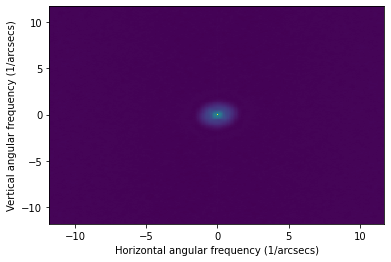

In [29]:
avg_power_spec=np.zeros([256,256],dtype=np.float) #we create an empty matrix for the power spectrum
n_frame=1000 #the number of frames we want to average
np.shape(ceres_image) #we are interested in the first set of values (z-axis)
for i in range(n_frame):
    shift=np.fft.fftshift(ceres_image[i,:,:])#we define a shift which will take the z-axis values only
    ft=np.fft.fftshift(np.fft.fft2(shift)) #we compute the Fourier transform of the z-values
    power_spec=(np.abs(ft))**2
    avg_power_spec+=power_spec
    
avg_power_spec_ceres=avg_power_spec/(n_frame) #we average by the number of frames

freq=np.fft.fftshift(np.fft.fftfreq(256,0.04236)) #we define the angular frequencies
x,y=np.meshgrid(freq,freq) #we create the associated grid (same dimensions because image is 256x256 pixels)
plt.pcolormesh(x,y,np.log(avg_power_spec_ceres)) 
plt.xlabel("Horizontal angular frequency (1/arcsecs)")
plt.ylabel("Vertical angular frequency (1/arcsecs)")

Text(0, 0.5, 'Vertical angular frequency (1/arcsecs)')

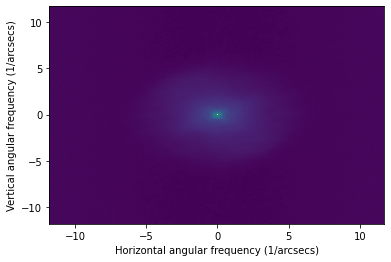

In [30]:
avg_power_spec=np.zeros([256,256],dtype=np.float) #we do the same code as before for Ceres' reference star
n_frame=1000

for i in range(n_frame):
    shift=np.fft.fftshift(ref_image[i,:,:])
    ft=np.fft.fftshift(np.fft.fft2(shift))
    power_spec=(np.abs(ft))**2
    avg_power_spec+=power_spec
    
avg_power_spec_ref=avg_power_spec/(n_frame)

freq=np.fft.fftshift(np.fft.fftfreq(256,0.04236))
x,y=np.meshgrid(freq,freq)
plt.pcolormesh(x,y, np.log(avg_power_spec_ref))
plt.xlabel("Horizontal angular frequency (1/arcsecs)")
plt.ylabel("Vertical angular frequency (1/arcsecs)")

Text(0, 0.5, 'Vertical angular frequency (1/arcsecs)')

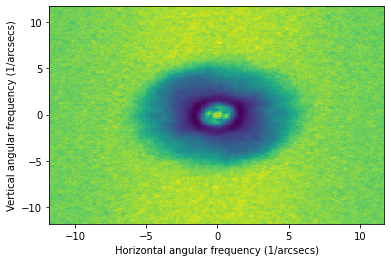

In [31]:
visib=np.sqrt(avg_power_spec_ceres/avg_power_spec_ref)

freq=np.fft.fftshift(np.fft.fftfreq(256,0.04236))
x,y=np.meshgrid(freq,freq)
plt.pcolormesh(x,y,visib)
plt.plot()
plt.xlabel("Horizontal angular frequency (1/arcsecs)")
plt.ylabel("Vertical angular frequency (1/arcsecs)")

Text(0, 0.5, 'Vertical angular frequency (1/arcsecs)')

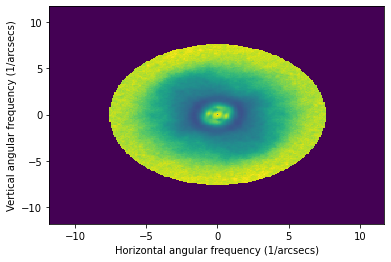

In [37]:
n=256
apod=np.zeros(np.shape(visib))*10e-15 #we avoid putting zero
freq=np.fft.fftshift(np.fft.fftfreq(256,0.04236))
#we create a disk of radius inferior to the cutoff frequency f_c:apodization
for i in range(n):
    for j in range(n):
        if (freq[i]-freq[128])**2+(freq[j]-freq[128])**2<(7.6)**2:
            apod[i,j]=visib[i,j]
                   
plt.grid()
x,y=np.meshgrid(freq,freq)
plt.pcolormesh(x,y,apod) #display of the apodized visibility
plt.xlabel("Horizontal angular frequency (1/arcsecs)")
plt.ylabel("Vertical angular frequency (1/arcsecs)")

Text(0, 0.5, 'Visibility (pixels)')

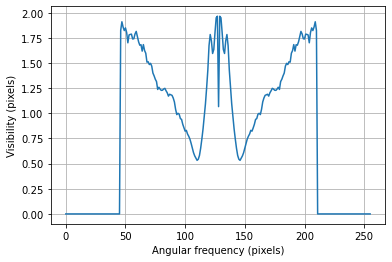

In [34]:
plt.grid()
plt.plot(apod[128]) #we select the central line (y=128 pixels)
plt.xlabel("Angular frequency (pixels)")
plt.ylabel("Visibility (pixels)")

location of the minimum value : (array([6]),)


Text(0, 0.5, 'Visibility (pixels)')

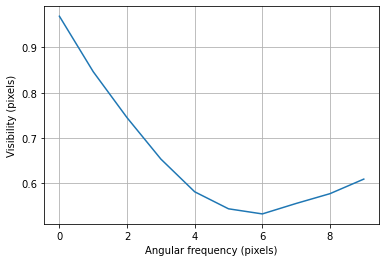

In [36]:
plt.grid()
plt.plot(apod[128,140:150]) #we select the area where we see the drop in the visibility
print("location of the minimum value :",argrelextrema(apod[128,140:156],np.less)) #we retrieve the position of the local minimum
plt.xlabel("Angular frequency (pixels)")
plt.ylabel("Visibility (pixels)")